# 1.import Libraries

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D,
    LSTM, Bidirectional, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    confusion_matrix, classification_report
)


# 2.Load Dataset

In [ ]:
data=pd.read_csv("/content/news.csv")
data1=pd.read_csv("/content/WELFake_Dataset.csv")
data2=pd.read_csv("/content/final_news_dataset.csv")
#Label (0 = fake and 1 = real).

# 3.Understand (EDA)& Clean the Data

In [ ]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
data.shape

(6335, 4)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
data['label'].replace({"FAKE":0,"REAL":1},inplace=True)

/tmp/ipython-input-3755823654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['label'].replace({"FAKE":0,"REAL":1},inplace=True)
/tmp/ipython-input-3755823654.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'].replace({"FAKE":0,"REAL":1},inplace=True)


In [ ]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [ ]:
data.value_counts('label')

,count
label,
1,3171
0,3164


In [ ]:
#Combine title + text
data['content'] = data1['title'].fillna('') + " " + data1['text'].fillna('')


In [ ]:
data.drop(columns={'Unnamed: 0', 'title', 'text'},axis=1,inplace=True)

In [ ]:
#Combine title + text
data1['content'] = data1['title'].fillna('') + " " + data1['text'].fillna('')


In [ ]:
data1.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'content'], dtype='object')

In [ ]:
data1=data1.drop(columns=['title','text','Unnamed: 0'])

In [ ]:
#compian 2 data sets
news=pd.concat([data,data1,data2],axis=0,ignore_index=True)

In [ ]:
news.columns

Index(['label', 'content'], dtype='object')

In [ ]:
news.shape

(117771, 2)

In [ ]:
news.duplicated().sum()

np.int64(11668)

In [ ]:
news=news.drop_duplicates()

In [ ]:
news.isna().sum()

,0
label,0
content,0


In [ ]:
news.shape

(106103, 2)

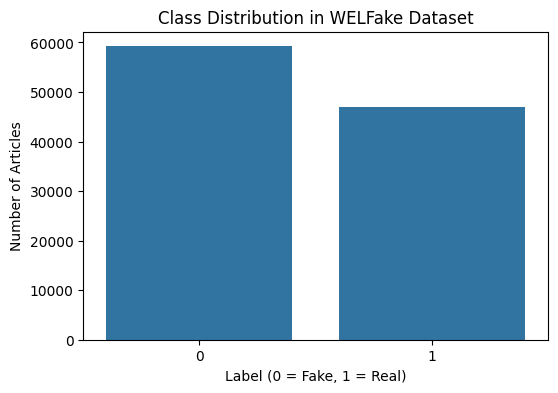

In [ ]:
#Class Distribution (Fake vs Real)
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=news)
plt.title("Class Distribution in WELFake Dataset")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Number of Articles")
plt.show()

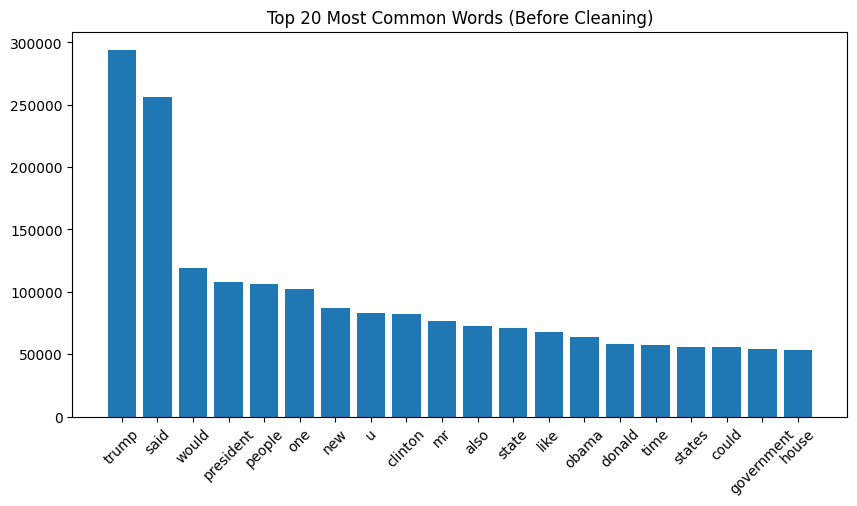

In [87]:
# Combine all text
all_text = " ".join(news['content'].astype(str))

# Clean text lightly
all_text = re.sub(r"[^a-zA-Z ]", "", all_text).lower()

# Word frequency
words = all_text.split()
word_freq = Counter(words)

common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words (Before Cleaning)")
plt.xticks(rotation=45)
plt.show()


# 4.Text Preprocessing

In [ ]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()                          # lowercase
    text = re.sub(r"http\S+", "", text)          # remove URLs
    text = re.sub(r"[^a-zA-Z ]", " ", text)     # remove special chars & numbers
    text = re.sub(r"\s+", " ", text)            # remove extra spaces
    words = text.split()                         # tokenize
    words = [w for w in words if w not in stopwords.words('english')]
    return " ".join(words)

news['content'] = news['content'].apply(clean_text)


# 5.Tokenization & Padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 50000
MAX_LEN = 400

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(news['content'])

x = pad_sequences(
    tokenizer.texts_to_sequences(news['content']),
    maxlen=MAX_LEN,
    padding="post"
)
y = news['label'].values


# 6.Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)



# 7.Build & Train Deep Learning Models

In [88]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [ ]:
cnn_model = Sequential([
    Embedding(50000, 128, input_length=400),
    Conv1D(128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

cnn_history = cnn_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 456s 427ms/step - accuracy: 0.7061 - loss: 0.5464 - val_accuracy: 0.7697 - val_loss: 0.4592
Epoch 2/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 467s 440ms/step - accuracy: 0.8033 - loss: 0.4023 - val_accuracy: 0.7623 - val_loss: 0.4686
Epoch 3/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 502s 440ms/step - accuracy: 0.8435 - loss: 0.3210 - val_accuracy: 0.7501 - val_loss: 0.5151
Epoch 4/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 451s 424ms/step - accuracy: 0.8715 - loss: 0.2512 - val_accuracy: 0.7384 - val_loss: 0.6362


In [ ]:
lstm_model = Sequential([
    Embedding(50000, 128, input_length=400),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

lstm_history = lstm_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1222s 1s/step - accuracy: 0.5558 - loss: 0.6644 - val_accuracy: 0.5728 - val_loss: 0.6471
Epoch 2/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1163s 1s/step - accuracy: 0.5815 - loss: 0.6286 - val_accuracy: 0.5722 - val_loss: 0.6582
Epoch 3/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1160s 1s/step - accuracy: 0.5823 - loss: 0.6168 - val_accuracy: 0.5694 - val_loss: 0.6775
Epoch 4/20
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1219s 1s/step - accuracy: 0.5899 - loss: 0.6091 - val_accuracy: 0.5667 - val_loss: 0.6896


In [ ]:
bilstm_model = Sequential([
    Embedding(50000, 128, input_length=400),
    Bidirectional(LSTM(128)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

bilstm_history = bilstm_model.fit(
    x_train, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/25
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2307s 2s/step - accuracy: 0.7665 - loss: 0.4896 - val_accuracy: 0.8193 - val_loss: 0.4010
Epoch 2/25
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2227s 2s/step - accuracy: 0.8776 - loss: 0.3122 - val_accuracy: 0.8223 - val_loss: 0.4087
Epoch 3/25
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2213s 2s/step - accuracy: 0.9124 - loss: 0.2286 - val_accuracy: 0.8096 - val_loss: 0.4926
Epoch 4/25
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2213s 2s/step - accuracy: 0.9302 - loss: 0.1717 - val_accuracy: 0.8018 - val_loss: 0.6067


# 8.Evaluate Model

In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = (model.predict(x_test) > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    return acc


In [ ]:
print("CNN Results")
cnn_acc = evaluate_model(cnn_model, x_test, y_test)

print("\nLSTM Results")
lstm_acc = evaluate_model(lstm_model, x_test, y_test)

print("\nBiLSTM Results")
bilstm_acc = evaluate_model(bilstm_model, x_test, y_test)


CNN Results
664/664 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step
Accuracy : 0.7640073512087083
Precision: 0.7681123088493357
Recall   : 0.6599181563644195
F1 Score : 0.7099165894346617

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     11935
           1       0.77      0.66      0.71      9286

    accuracy                           0.76     21221
   macro avg       0.76      0.75      0.76     21221
weighted avg       0.76      0.76      0.76     21221


LSTM Results
664/664 ━━━━━━━━━━━━━━━━━━━━ 141s 213ms/step
Accuracy : 0.5789076857829508
Precision: 0.6732673267326733
Recall   : 0.07322851604566014
F1 Score : 0.1320901320901321

Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.97      0.72     11935
           1       0.67      0.07      0.13      9286

    accuracy                           0.58     21221
   macro avg       0.62      0.52      0.43     21

In [ ]:
models = {
    "CNN": (cnn_model, cnn_acc),
    "LSTM": (lstm_model, lstm_acc),
    "BiLSTM": (bilstm_model, bilstm_acc)
}

best_model_name = max(models, key=lambda x: models[x][1])
best_model = models[best_model_name][0]

print("Best Model:", best_model_name)


Best Model: BiLSTM


664/664 ━━━━━━━━━━━━━━━━━━━━ 251s 378ms/step


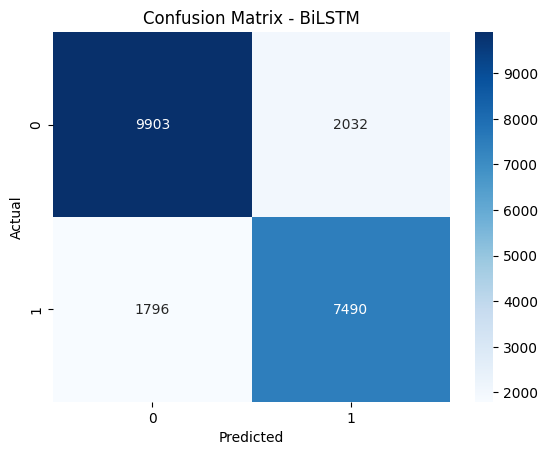

In [ ]:
y_pred = (best_model.predict(x_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


664/664 ━━━━━━━━━━━━━━━━━━━━ 245s 368ms/step


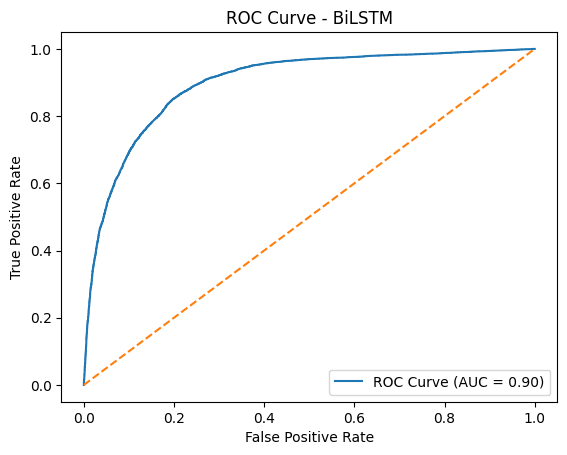

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_prob = best_model.predict(x_test).ravel()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name}")
plt.legend(loc="lower right")
plt.show()


In [ ]:
best_model.save("fake_news_best_model.h5")

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [ ]:
def limit_words(text, max_words=150):
    return " ".join(text.split()[:max_words])

print("----- FAKE NEWS -----")
fake_news = news[news['label'] == 0]['content'].head(3)

for i, text in enumerate(fake_news, 1):
    print(f"\nFake News {i}:\n{limit_words(text)}\n")


print("----- REAL NEWS -----")
real_news = news[news['label'] == 1]['content'].head(5)

for i, text in enumerate(real_news, 1):
    print(f"\nReal News {i}:\n{limit_words(text)}\n")


----- FAKE NEWS -----

Fake News 1:
law enforcement high alert following threats cops whites blacklivesmatter fyf terrorists video comment expected barack obama members fyf fukyoflag blacklivesmatter movements called lynching hanging white people cops encouraged others radio show tuesday night turn tide kill white people cops send message killing black people america one f yoflag organizers called sunshine radio blog show hosted texas called sunshine f ing opinion radio show snapshot fyf lolatwhitefear twitter page p shows urging supporters call fyf tonight continue dismantle illusion white snapshot twitter radio call invite fyf radio show aired p eastern standard time show callers clearly call lynching killing white people minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threats result interrupting fyf conference calls unidentified black man said mother f kers start f ing like us bunch ni ers takin one us roll said cause